<a href="https://colab.research.google.com/github/TerradasExatas/IA_e_Machine_Learning/blob/main/IA_C_means_scikit_fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install scikit-fuzzy

     |████████████████████████████████| 993 kB 3.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=bea04a10002fa8f2a798b514145d2ce55e2fa32e9426089b3c0df73c4903e19a
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


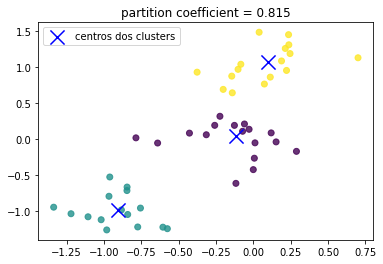

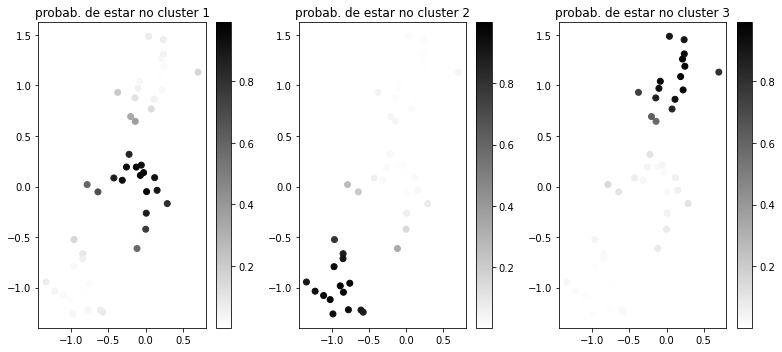

In [1]:
#https://pythonhosted.org/scikit-fuzzy/
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
#importa o dataset de um arquivo .csv
X = np.genfromtxt('data_set_c_means.csv', delimiter=',')
#Agrupa a entrada em 3 clusters
centros, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X.T, c=3, m=2, error=0.005, maxiter=1000)

#obtem outras saída:
# obtem as probabilidades
prob=u.T; #probabilidades
# obtem os labels mais provaveis
cmeans_labels = np.argmax(prob, axis=1)

#gráfico dos clusters
plt.figure()
plt.scatter(X[:,0], X[:,1], c=cmeans_labels, alpha=.8)
plt.scatter(centros[:,0], centros[:,1], marker="x", s=200, c='b',label='centros dos clusters')
plt.title(f'partition coefficient = {fpc:.3f}')
plt.legend()
plt.show()

# graficos das probabilidades por clusters
plt.figure(figsize=(11,5))
plt.subplot(1,3,1)
plt.scatter(X[:,0], X[:,1], c=prob[:,0],cmap=plt.cm.binary)
plt.colorbar(),plt.title('probab. de estar no cluster 1')
plt.subplot(1,3,2)
plt.scatter(X[:,0], X[:,1], c=prob[:,1],cmap=plt.cm.binary)
plt.colorbar(),plt.title('probab. de estar no cluster 2')
plt.subplot(1,3,3)
plt.scatter(X[:,0], X[:,1], c=prob[:,2],cmap=plt.cm.binary)
plt.colorbar(),plt.title('probab. de estar no cluster 3')
plt.tight_layout()

In [2]:
#gera um data_set com 3 clusters em 2 dimensões em CSV
import numpy as np
n_amostras = 16
#desvio padrão, define se os pontos de um cluster
#irão se espalhar para os outros clusters
desv=0.3 
data = np.concatenate((
    np.random.normal((0, 0),(desv, desv), size=(n_amostras, 2)),
    np.random.normal((-1, -1),(desv, desv), size=(n_amostras, 2)),
    np.random.normal((0, 1),(desv, desv), size=(n_amostras, 2))
))
#salva os pontos em um arquivo
np.savetxt('data_set_c_means.csv', data, delimiter=',')
#print(data)

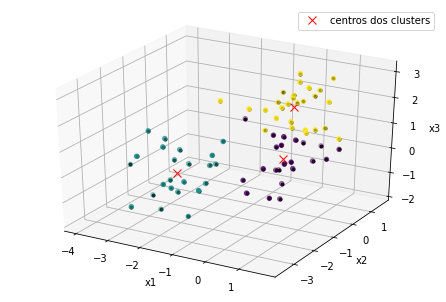

(<matplotlib.colorbar.Colorbar at 0x7f5c39a66d90>,
 Text(0.5, 0.92, 'probab. de estar no cluster 3'))

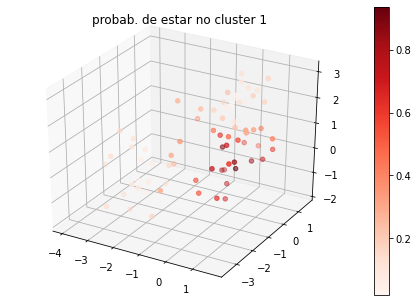

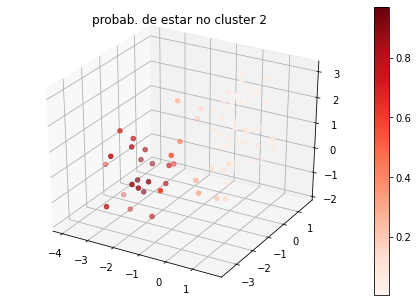

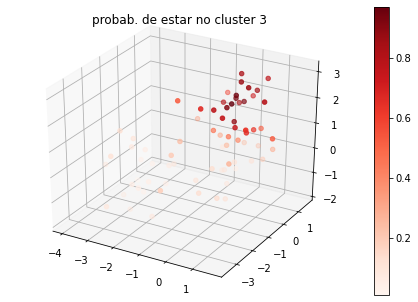

In [20]:
#https://pythonhosted.org/scikit-fuzzy/
#fuzzy cmeans 3D
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from mpl_toolkits.mplot3d import Axes3D

X = np.genfromtxt('data_set_c_means3D.csv', delimiter=',')

centros_T, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        X.T, c=3, m=2, error=0.005, maxiter=1000)
centros=centros_T
cmeans_labels = np.argmax(u.T, axis=1)
prob=u.T;
#fazendo um gráfico 3D dos clusters
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X[:,0], X[:,1], X[:,2],'k.')
ax.scatter(X[:,0], X[:,1], X[:,2],c=cmeans_labels)
ax.plot(centros[:,0],centros[:,1],centros[:,2],'rx',markersize=8,label='centros dos clusters')
ax.set_xlabel('x1');ax.set_ylabel('x2');ax.set_zlabel('x3')
plt.legend()
plt.show()

# graficos 3D das probabilidades por clusters

fig3d = plt.figure()
ax = Axes3D(fig3d)
p=ax.scatter(X[:,0], X[:,1], X[:,2],c=prob[:,0],cmap=plt.cm.Reds)
fig3d.colorbar(p, ax=ax),plt.title('probab. de estar no cluster 1')
fig3d = plt.figure()
ax = Axes3D(fig3d)
p=ax.scatter(X[:,0], X[:,1], X[:,2],c=prob[:,1],cmap=plt.cm.Reds)
fig3d.colorbar(p, ax=ax),plt.title('probab. de estar no cluster 2')
fig3d = plt.figure()
ax = Axes3D(fig3d)
p=ax.scatter(X[:,0], X[:,1], X[:,2],c=prob[:,2],cmap=plt.cm.Reds)
fig3d.colorbar(p, ax=ax),plt.title('probab. de estar no cluster 3')

In [19]:
#gera um data_set 3D em CSV

import numpy as np
n_amostras = 24
desv=0.7
data = np.concatenate((
    np.random.normal((-2, -2, 0),(desv, desv, desv), size=(n_amostras, 3)),
    np.random.normal((0, 0, 0),(desv, desv, desv), size=(n_amostras, 3)),
    np.random.normal((0, 0, 2),(desv, desv, desv), size=(n_amostras, 3))
))
np.savetxt('data_set_c_means3D.csv', data, delimiter=',')
#print(data)